In [1]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/cirrhosis.csv')
data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


### 1. **Data Understanding**

In [3]:
# Menampilkan statistik deskriptif
print(data.describe())

               ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   284.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   231.944545   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   249.500000   
50%    209.500000  1730.000000  18628.000000    1.400000   309.500000   
75%    313.750000  2613.500000  21272.500000    3.400000   400.000000   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  310.000000    312.000000  312.000000     282.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   85.613920   2140.388824   56.699525      65.148639   
min      1.960000    4.000000    289.000000   

In [4]:
# Menampilkan informasi tipe data dan jumlah nilai non-null
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

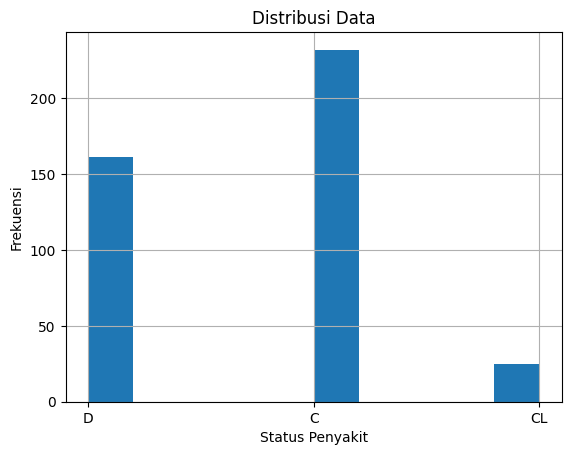

In [5]:
import matplotlib.pyplot as plt

# Menampilkan histogram untuk satu kolom
data['Status'].hist()
plt.title('Distribusi Data')
plt.xlabel('Status Penyakit')
plt.ylabel('Frekuensi')
plt.show()

In [6]:
# Menampilkan jumlah nilai yang hilang per kolom
print(data.isnull().sum())

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [7]:
#Menghapus data yang bernilai NaND
data = data.dropna()

In [8]:
# Menampilkan data yang telah dihapus
print(data.isnull().sum())

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


In [9]:
#Melihat banyaknya nilai pada atribute Kolom Status
data.Status.value_counts()


C     147
D     111
CL     18
Name: Status, dtype: int64

In [10]:
#Melihat banyaknya nilai pada atribute Kolom Obat
data.Drug.value_counts()

Placebo            140
D-penicillamine    136
Name: Drug, dtype: int64

In [11]:
#melihat nilai duplikasi
data.duplicated().sum()

0

## **2. Data Preparation**

In [12]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [20]:
#Menghapus kolom yang tidak digunakan
del data['Age']

In [21]:
data.head()

,Status,Drug,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D,D-penicillamine,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,C,D-penicillamine,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,D,D-penicillamine,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,D,D-penicillamine,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,CL,Placebo,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [22]:
#Melakukan pergantian nilai string ke integer
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Status'] = label_encoder.fit_transform(data['Status'])
data['Drug'] = label_encoder.fit_transform(data['Drug'])
data['Ascites'] = label_encoder.fit_transform(data['Ascites'])
data['Hepatomegaly'] = label_encoder.fit_transform(data['Hepatomegaly'])
data['Spiders'] = label_encoder.fit_transform(data['Spiders'])
data['Edema'] = label_encoder.fit_transform(data['Edema'])

<ipython-input-22-1d09d4d3905c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Status'] = label_encoder.fit_transform(data['Status'])
<ipython-input-22-1d09d4d3905c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Drug'] = label_encoder.fit_transform(data['Drug'])
<ipython-input-22-1d09d4d3905c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Keterangan :
1. Status : 2 (D = Kematian), 0 (C= Sensor), 1(CL = Transplantasi hati)
2. Drug : 0 (D-penicillamine), 1(Placebo)
3. Arsites ; 0(yes), 1(no)
4. Hepatomegaly : 1 (Yes), 0 (No)
5. Spiders : 1 (yes), 0 (no)
6. Edema : 2 (yes), 0 (no), 1 (S)
Pada Edema S adalah muncul tanpa diuretik, atau teratasi oleh diuretik

In [23]:
data

,Status,Drug,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,0,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,2,0,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,2,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1,1,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0,0,0,1,0,0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,0,1,0,0,0,0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,0,0,0,0,0,0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,0,0,0,0,0,0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [24]:
#Proses spliting data
x = data.drop(columns=['Status'])
y = data['Status']

print ("X : ", x.shape)
print ("y : ", y.shape)

X :  (276, 15)
y :  (276,)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (220, 15)
y_train : (220,)
x_test : (56, 15)
y_test : (56,)


In [26]:
x_train

,Drug,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
293,0,0,1,0,0,6.6,1000.0,3.07,88.0,3150.0,193.00,133.0,299.0,10.9,4.0
266,0,1,1,1,2,6.6,222.0,2.33,138.0,620.0,106.00,91.0,195.0,12.1,4.0
35,1,0,0,0,0,0.3,172.0,3.39,18.0,558.0,71.30,96.0,311.0,10.6,2.0
183,1,0,1,0,0,11.0,674.0,3.55,358.0,2412.0,167.40,140.0,471.0,9.8,3.0
169,0,0,0,0,0,1.2,390.0,3.61,32.0,1509.0,88.35,52.0,263.0,9.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,1,0,1,0,0,0.9,360.0,3.65,72.0,3186.0,94.55,154.0,269.0,9.7,4.0
81,0,0,0,0,0,4.5,472.0,4.09,154.0,1580.0,117.80,272.0,412.0,11.1,3.0
119,0,0,0,0,0,3.5,325.0,3.98,444.0,766.0,130.20,210.0,344.0,10.6,3.0
306,1,0,0,0,0,0.8,273.0,3.56,52.0,1282.0,130.00,59.0,344.0,10.5,2.0


In [27]:
y_train

293    0
266    2
35     0
183    2
169    0
      ..
220    0
81     2
119    1
306    0
115    0
Name: Status, Length: 220, dtype: int64

### **3. Modelling**

In [28]:
Naive = GaussianNB()
Naive.fit(x_train, y_train)

GaussianNB()

In [29]:
y_pred = Naive.predict(x_test)

In [30]:
#Data Status
y_pred

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0])

In [31]:
from sklearn.metrics import confusion_matrix
matrik = confusion_matrix(y_test, y_pred)
matrik

array([[30,  0,  0],
       [ 0,  0,  0],
       [13,  4,  9]])

In [32]:
#MElakukan proses evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Tampilkan hasil evaluasi
print('Akurasi Naive Bayes: {:.2f}%'.format(accuracy*100))
print('Precision: {:.2f}%'.format(precision*100))
print('Recall: {:.2f}%'.format(recall*100))
print('F1 Score: {:.2f}%'.format(f1*100))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', conf_matrix)

Akurasi Naive Bayes: 69.64%
Precision: 83.80%
Recall: 69.64%
F1 Score: 67.91%

Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82        30
           1       0.00      0.00      0.00         0
           2       1.00      0.35      0.51        26

    accuracy                           0.70        56
   macro avg       0.57      0.45      0.45        56
weighted avg       0.84      0.70      0.68        56


Confusion Matrix:
 [[30  0  0]
 [ 0  0  0]
 [13  4  9]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
#Melakukan proses inputan data
testing = {'Drug': [2],
           'Ascites': [1],
           'Hepatomegaly': [1],
           'Spiders': [1],
           'Edema': [2],
           'Bilirubin': [22.34],
           'Cholesterol': [300.0],
           'Albumin': [1.15],
           'Copper': [39.0],
           'Alk_Phos': [200.0],
           'SGOT': [301.09],
           'Tryglicerides': [40.5],
           'Platelets': [223.15],
           'Prothrombin': [15.0],
           'Stage': [2.0]
           }

testing = pd.DataFrame(testing)
testing

,Drug,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2,1,1,1,2,22.34,300.0,1.15,39.0,200.0,301.09,40.5,223.15,15.0,2.0


In [35]:
#Memprediksi hasil inputan Data
pred_testing = Naive.predict(testing)
print('Hasil Testing Data Baru :')
print(pred_testing)

Hasil Testing Data Baru :
[2]
